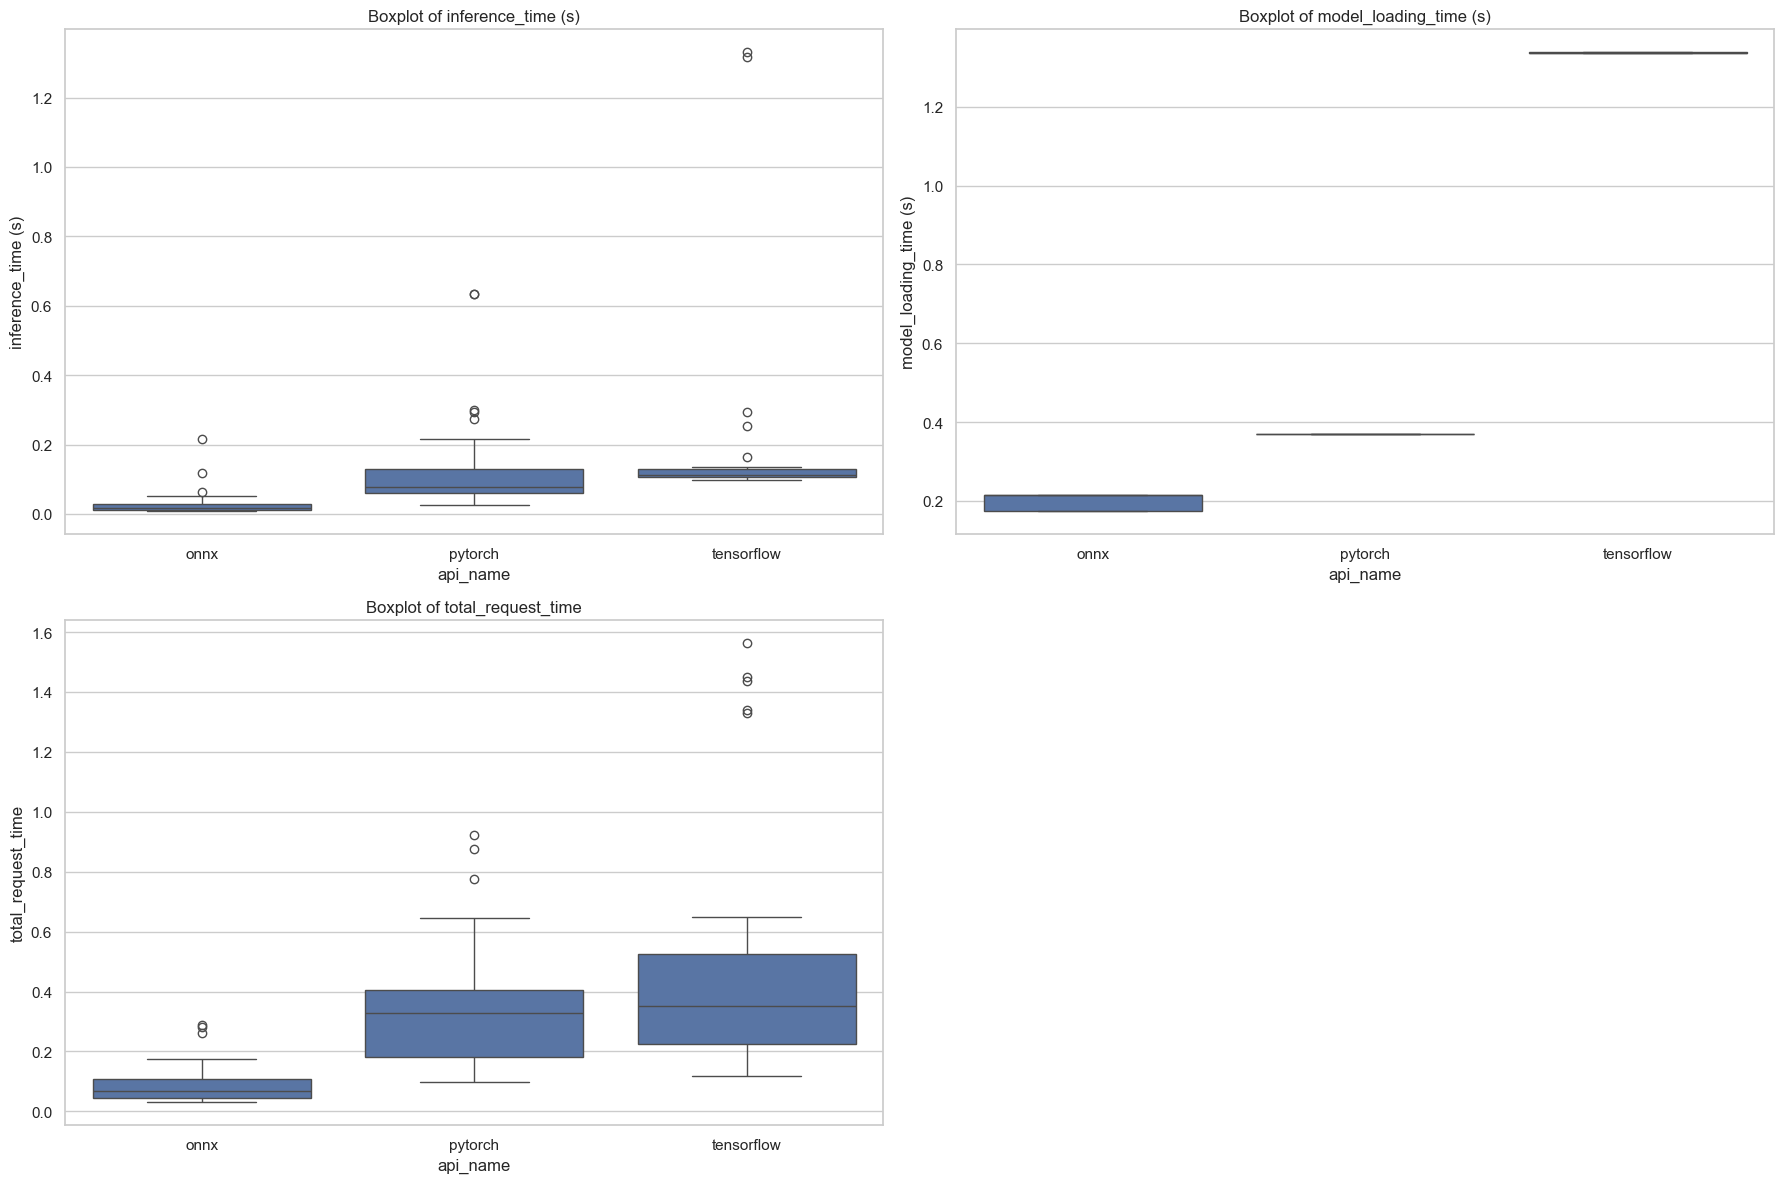

<Figure size 1500x600 with 0 Axes>

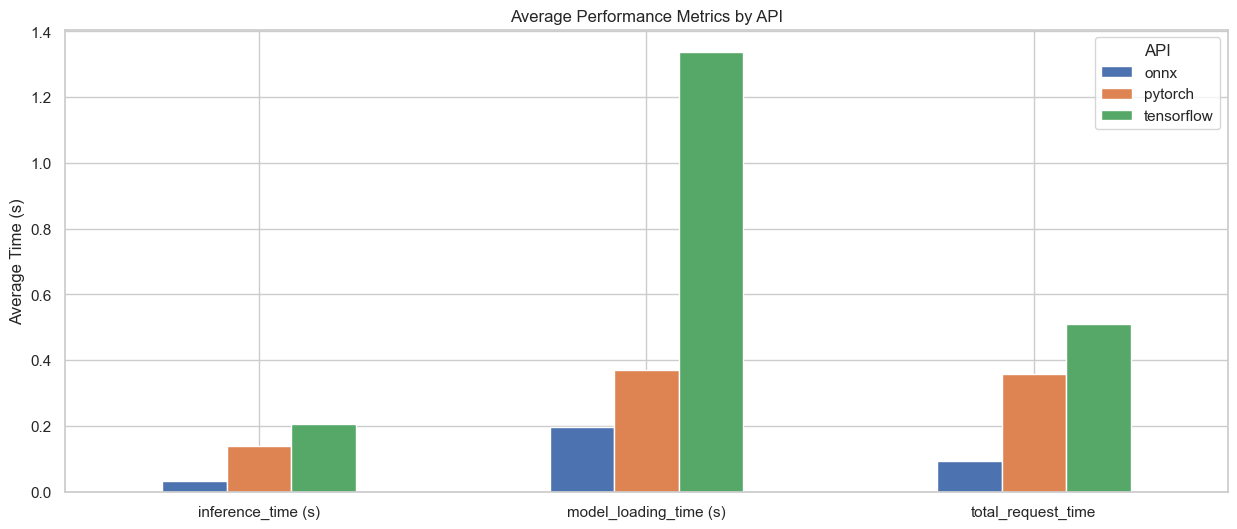

C:\Users\ntrapsida\AppData\Local\Temp\ipykernel_239196\4091411467.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='API')


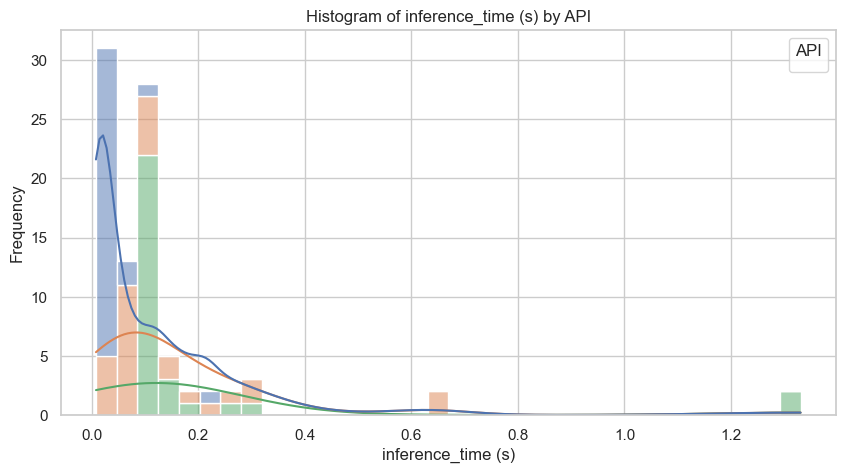

C:\Users\ntrapsida\AppData\Local\Temp\ipykernel_239196\4091411467.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='API')


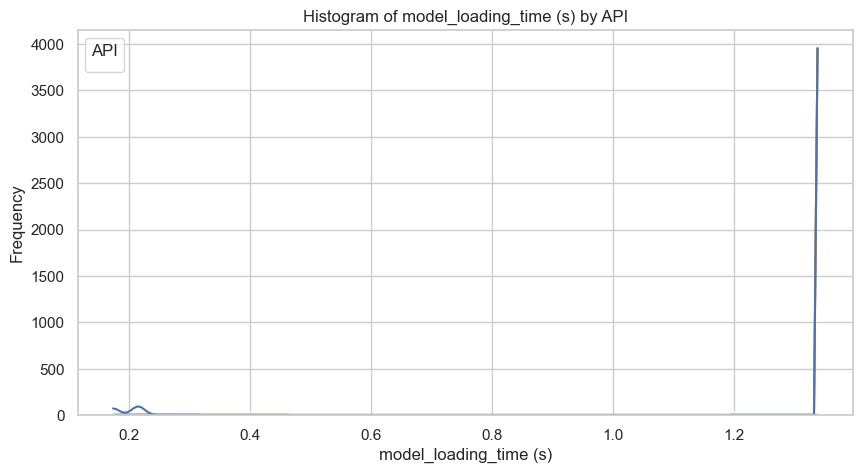

C:\Users\ntrapsida\AppData\Local\Temp\ipykernel_239196\4091411467.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='API')


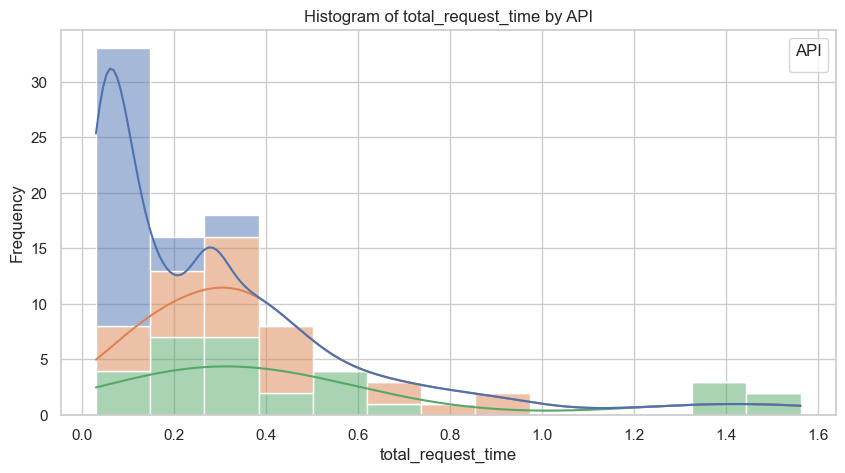

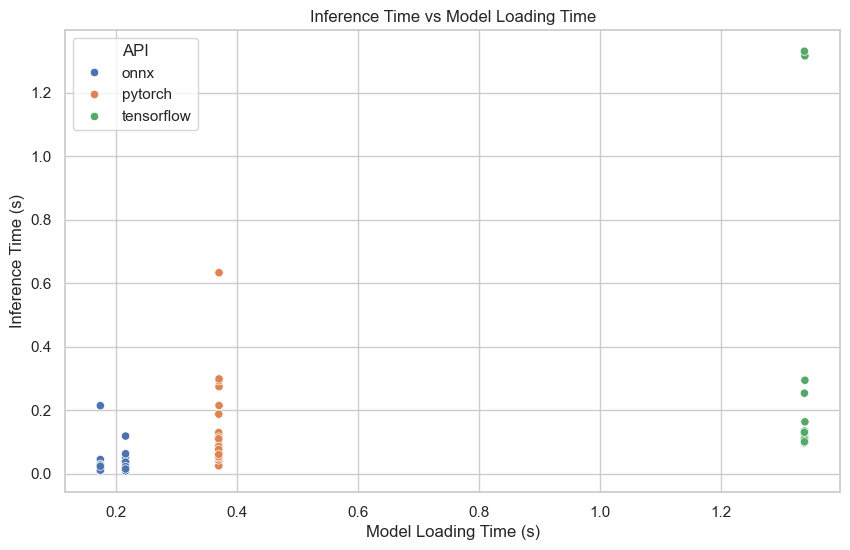

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = './benchmark/results/benchmark_results.csv'
data = pd.read_csv(file_path)

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# List of metrics to visualize
metrics = [
    'inference_time (s)',
    'model_loading_time (s)',
    'total_request_time'
]

# Create a figure for boxplots
plt.figure(figsize=(18, 12))

# Boxplots for each metric
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='api_name', y=metric, data=data)
    plt.title(f'Boxplot of {metric}')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# Average values for each API
avg_values = data.groupby('api_name')[metrics].mean().reset_index()

# Bar plots for average values
plt.figure(figsize=(15, 6))
avg_values.set_index('api_name').T.plot(kind='bar', figsize=(15, 6))
plt.title('Average Performance Metrics by API')
plt.ylabel('Average Time (s)')
plt.xticks(rotation=0)
plt.legend(title='API')
plt.show()

# Histograms for each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=metric, hue='api_name', kde=True, multiple='stack')
    plt.title(f'Histogram of {metric} by API')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend(title='API')
    plt.show()

# Scatter plot for inference time vs. model loading time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='model_loading_time (s)', y='inference_time (s)', hue='api_name')
plt.title('Inference Time vs Model Loading Time')
plt.xlabel('Model Loading Time (s)')
plt.ylabel('Inference Time (s)')
plt.legend(title='API')
plt.show()
